In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

### Read Dataset

In [2]:
df_train = pd.read_csv("health_train.csv")
df_train

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.058051,male,27.555148,no,southeast,4,5889.103901
2496,36.833818,male,30.322446,no,northeast,3,6788.534095
2497,56.000000,female,36.179587,no,northwest,2,12401.746575
2498,49.000000,male,36.429614,no,northwest,3,10376.294629


In [3]:
df_test = pd.read_csv("health_test.csv")
df_test

,age,sex,bmi,smoker,region,children
0,39.296556,male,29.978109,no,northwest,4
1,40.367560,female,27.927669,no,southeast,5
2,32.881563,male,41.576865,no,southwest,5
3,62.000000,female,30.495000,no,northwest,2
4,32.476173,male,30.322774,yes,northeast,4
...,...,...,...,...,...,...
446,43.000000,male,35.531966,yes,southeast,2
447,31.374148,male,28.278549,no,northeast,4
448,50.370750,female,26.766297,no,northwest,4
449,49.201678,female,31.396840,no,northwest,4


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       451 non-null    float64
 1   sex       451 non-null    object 
 2   bmi       451 non-null    float64
 3   smoker    451 non-null    object 
 4   region    451 non-null    object 
 5   children  451 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2500.0,39.003033,12.264536,18.0000,28.845667,39.350208,48.688741,64.00000
bmi,2500.0,30.575497,5.390169,15.9600,26.717647,30.200000,34.046166,53.13000
children,2500.0,2.488400,1.707346,0.0000,1.000000,2.000000,4.000000,5.00000
charges,2500.0,12679.311518,10593.270485,1121.8739,5612.780878,9455.047274,14440.628060,63770.42801


In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,451.0,38.806482,11.789015,18.0,30.000000,39.000000,48.000000,64.00
bmi,451.0,30.833082,5.538067,17.8,26.733148,30.322774,34.181785,47.74
children,451.0,2.556541,1.738012,0.0,1.000000,3.000000,4.000000,5.00


In [8]:
df_train.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [9]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64

In [10]:
df_train = df_train.round({"age": 0, "bmi": 2})
df_train

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.74,no,northeast,2,3279.868550
1,37.0,female,25.74,yes,southeast,3,21454.494239
2,18.0,male,30.03,no,southeast,1,1720.353700
3,37.0,male,30.68,no,northeast,3,6801.437542
4,58.0,male,32.01,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.0,male,27.56,no,southeast,4,5889.103901
2496,37.0,male,30.32,no,northeast,3,6788.534095
2497,56.0,female,36.18,no,northwest,2,12401.746575
2498,49.0,male,36.43,no,northwest,3,10376.294629


In [11]:
df_test = df_test.round({"age": 0, "bmi": 2})
df_test

,age,sex,bmi,smoker,region,children
0,39.0,male,29.98,no,northwest,4
1,40.0,female,27.93,no,southeast,5
2,33.0,male,41.58,no,southwest,5
3,62.0,female,30.50,no,northwest,2
4,32.0,male,30.32,yes,northeast,4
...,...,...,...,...,...,...
446,43.0,male,35.53,yes,southeast,2
447,31.0,male,28.28,no,northeast,4
448,50.0,female,26.77,no,northwest,4
449,49.0,female,31.40,no,northwest,4


In [12]:
for col in df_train.select_dtypes('object').columns:
    print(f"{col:<20}:", df_train[col].nunique())

sex                 : 2
smoker              : 2
region              : 4


In [13]:
for col in df_test.select_dtypes('object').columns:
    print(f"{col:<20}:", df_test[col].nunique())

sex                 : 2
smoker              : 2
region              : 4


<AxesSubplot:>

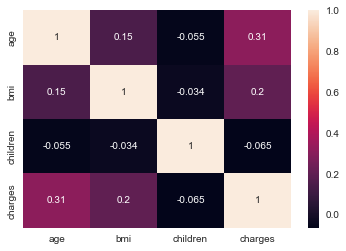

In [14]:
sns.heatmap(df_train.corr(), annot =True)

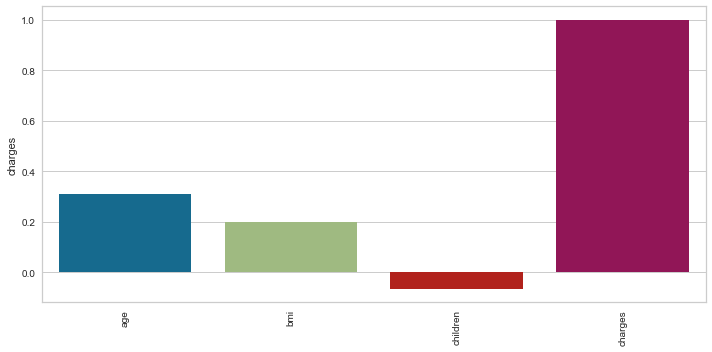

In [15]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_train.corr()["charges"].index, y = df_train.corr()["charges"])
plt.xticks(rotation=90)
plt.tight_layout();

<AxesSubplot:xlabel='age'>

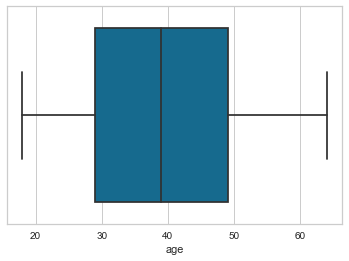

In [16]:
sns.boxplot(df_train.age)

<AxesSubplot:xlabel='bmi'>

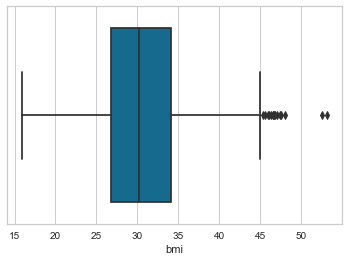

In [17]:
sns.boxplot(df_train.bmi)

<AxesSubplot:xlabel='children'>

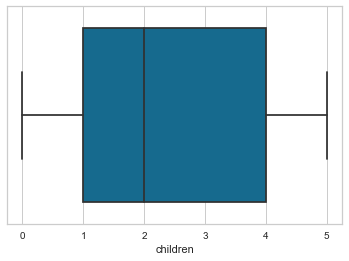

In [18]:
sns.boxplot(df_train.children)

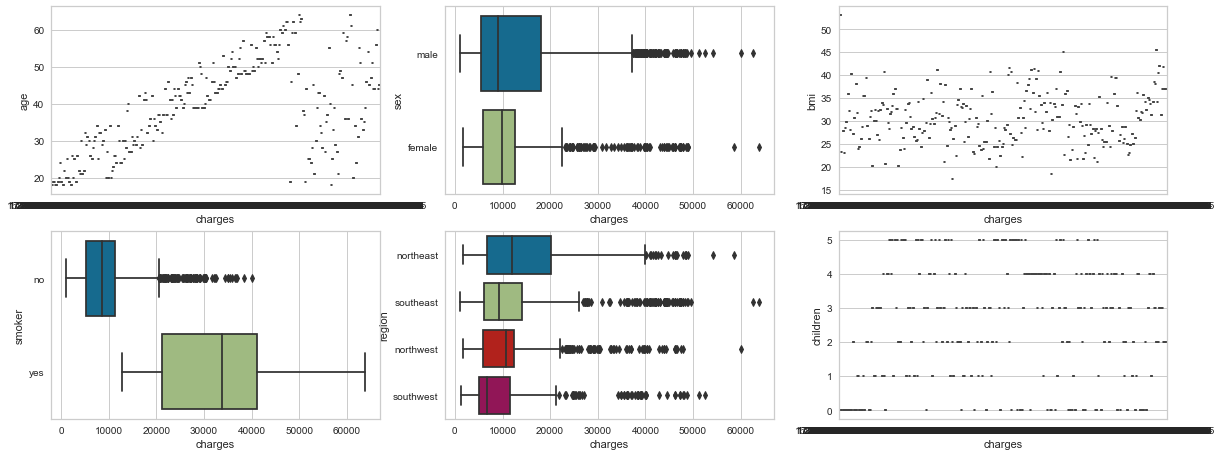

In [19]:
index = 0
plt.figure(figsize=(20,20))
for feature in df_train.columns:
    if feature != "charges":
        index += 1
        plt.subplot(5, 3, index)
        sns.boxplot(x='charges', y = feature, data=df_train)

In [20]:
index = 0
for feature in df_train.columns:
        index += 1
        print(df_train[feature].name)
        print("***********")
        print(df_train[feature].value_counts())

age
***********
49.0    97
48.0    92
39.0    89
33.0    71
40.0    70
45.0    68
18.0    66
46.0    66
50.0    65
41.0    64
43.0    64
44.0    63
25.0    63
19.0    63
31.0    62
30.0    61
27.0    60
20.0    60
42.0    60
26.0    59
51.0    59
35.0    58
29.0    58
47.0    56
32.0    55
37.0    53
34.0    53
28.0    51
21.0    49
22.0    48
23.0    48
54.0    46
36.0    46
38.0    43
24.0    42
52.0    41
53.0    41
59.0    40
56.0    39
55.0    38
57.0    33
58.0    27
60.0    25
61.0    24
62.0    23
63.0    21
64.0    20
Name: age, dtype: int64
sex
***********
male      1387
female    1113
Name: sex, dtype: int64
bmi
***********
32.30    13
30.50    11
28.31     9
27.84     9
29.83     8
         ..
42.40     1
46.70     1
27.80     1
38.90     1
36.64     1
Name: bmi, Length: 1289, dtype: int64
smoker
***********
no     2124
yes     376
Name: smoker, dtype: int64
region
***********
southeast    699
northwest    613
northeast    606
southwest    582
Name: region, dtype: int64
chi

<AxesSubplot:>

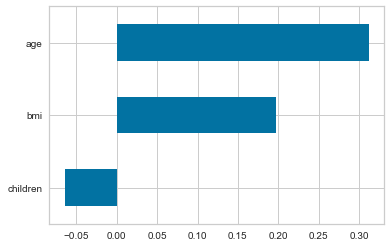

In [21]:
df_train.corr()["charges"].drop("charges").sort_values().plot.barh()

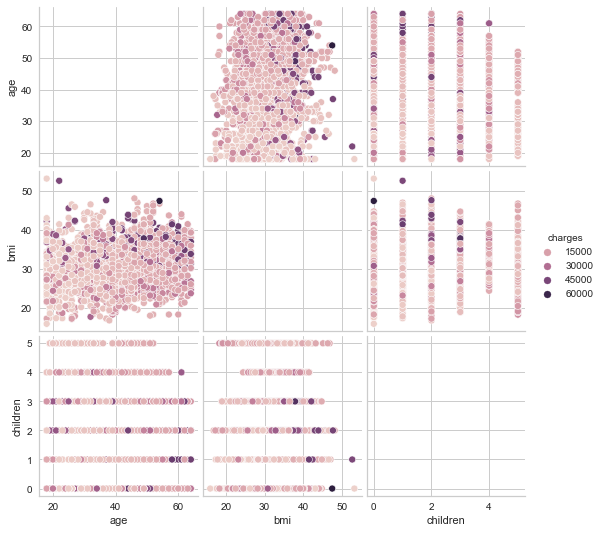

In [22]:
sns.pairplot(df_train, hue = "charges")

In [23]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.74,2,3279.868550,1,0,0,0,0
1,37.0,25.74,3,21454.494239,0,1,0,1,0
2,18.0,30.03,1,1720.353700,1,0,0,1,0
3,37.0,30.68,3,6801.437542,1,0,0,0,0
4,58.0,32.01,1,11946.625900,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2495,31.0,27.56,4,5889.103901,1,0,0,1,0
2496,37.0,30.32,3,6788.534095,1,0,0,0,0
2497,56.0,36.18,2,12401.746575,0,0,1,0,0
2498,49.0,36.43,3,10376.294629,1,0,1,0,0


In [24]:
df_test= pd.get_dummies(df_test, drop_first=True)
df_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,39.0,29.98,4,1,0,1,0,0
1,40.0,27.93,5,0,0,0,1,0
2,33.0,41.58,5,1,0,0,0,1
3,62.0,30.50,2,0,0,1,0,0
4,32.0,30.32,4,1,1,0,0,0
...,...,...,...,...,...,...,...,...
446,43.0,35.53,2,1,1,0,1,0
447,31.0,28.28,4,1,0,0,0,0
448,50.0,26.77,4,0,0,1,0,0
449,49.0,31.40,4,0,0,1,0,0


In [25]:
X = df_train.drop(columns ="charges")
y = df_train["charges"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =101)


In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(X_train)

MinMaxScaler()

In [29]:
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
y_pred = lm.predict(X_test_scaled) 

In [33]:
y_train_pred = lm.predict(X_train_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [35]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,7.012284e-01,7.574720e-01
mae,3.880411e+03,3.553826e+03
mse,3.349847e+07,2.722933e+07
rmse,5.787786e+03,5.218173e+03


In [36]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)  #yeni bir feature eklenince onunla ilgili yeni veri girmemiz gerekir.
    return adj_r2

In [37]:
adj_r2(y_test, y_pred, df_train)

0.756693064691715

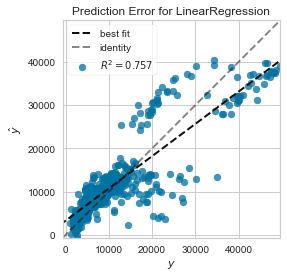

In [38]:
from yellowbrick.regressor import PredictionError  # yaptığımız tahminlerin hatasını gösteriyor.
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

In [39]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [40]:
pd.DataFrame(scores, index = range(1,6)) 

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001992,0.001993,0.705840,-3929.501715,-3.485698e+07,-5903.980014
2,0.000996,0.000997,0.700511,-3987.227067,-3.682143e+07,-6068.066811
3,0.000996,0.000999,0.672092,-3905.869842,-3.187520e+07,-5645.812558
4,0.000997,0.000000,0.714938,-3697.819454,-3.161282e+07,-5622.527484
5,0.000996,0.000000,0.697235,-3941.179805,-3.351913e+07,-5789.570912


In [41]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             6.981232e-01
test_neg_mean_absolute_error       -3.892320e+03
test_neg_mean_squared_error        -3.373711e+07
test_neg_root_mean_squared_error   -5.805992e+03
dtype: float64

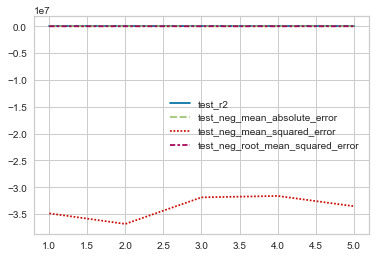

In [42]:
sns.lineplot(data = scores.iloc[:,2:]);

In [43]:
from sklearn.linear_model import Ridge

In [44]:
ridge_model = Ridge(alpha=1, random_state=101)

In [45]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=101)

In [46]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [47]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,7.012063e-01,7.572551e-01
mae,3.881743e+03,3.555686e+03
mse,3.350095e+07,2.725367e+07
rmse,5.788001e+03,5.220505e+03


In [48]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,7.012284e-01,7.574720e-01,7.012063e-01,7.572551e-01
mae,3.880411e+03,3.553826e+03,3.881743e+03,3.555686e+03
mse,3.349847e+07,2.722933e+07,3.350095e+07,2.725367e+07
rmse,5.787786e+03,5.218173e+03,5.788001e+03,5.220505e+03


In [49]:
model = Ridge(alpha=1, random_state=101) 
# modelimizi burada sıfırlıyoruz. Aksi takdirde tekrar bir data leakage durumu söz konusu olabilir.
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [50]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001995,0.000996,0.705463,-3932.499000,-3.490175e+07,-5907.770222
2,0.002990,0.003989,0.700372,-3988.528883,-3.683845e+07,-6069.468407
3,0.001992,0.000996,0.672628,-3905.088937,-3.182305e+07,-5641.191967
4,0.001002,0.000991,0.714573,-3699.697600,-3.165334e+07,-5626.130307
5,0.000997,0.001003,0.697676,-3941.950581,-3.347030e+07,-5785.352073


In [51]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             6.981424e-01
test_neg_mean_absolute_error       -3.893553e+03
test_neg_mean_squared_error        -3.373738e+07
test_neg_root_mean_squared_error   -5.805983e+03
dtype: float64

In [52]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,7.012063e-01,7.572551e-01
mae,3.881743e+03,3.555686e+03
mse,3.350095e+07,2.725367e+07
rmse,5.788001e+03,5.220505e+03


In [53]:
from sklearn.linear_model import RidgeCV

In [54]:
alpha_space = np.linspace(0.01, 1, 100) 
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [55]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [56]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [57]:
ridge_cv_model.alpha_ 

0.51

In [58]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [59]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,7.012226e-01,7.573667e-01
mae,3.881035e+03,3.554613e+03
mse,3.349912e+07,2.724114e+07
rmse,5.787843e+03,5.219305e+03


In [60]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,7.012284e-01,7.574720e-01,7.012063e-01,7.572551e-01,7.012226e-01,7.573667e-01
mae,3.880411e+03,3.553826e+03,3.881743e+03,3.555686e+03,3.881035e+03,3.554613e+03
mse,3.349847e+07,2.722933e+07,3.350095e+07,2.725367e+07,3.349912e+07,2.724114e+07
rmse,5.787786e+03,5.218173e+03,5.788001e+03,5.220505e+03,5.787843e+03,5.219305e+03


In [61]:
from sklearn.linear_model import Lasso, LassoCV

In [62]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=101)

In [63]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [64]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,7.012272e-01,7.574650e-01
mae,3.879861e+03,3.552998e+03
mse,3.349860e+07,2.723011e+07
rmse,5.787798e+03,5.218247e+03


In [65]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,7.012284e-01,7.574720e-01,7.012063e-01,7.572551e-01,7.012226e-01,7.573667e-01,7.012272e-01,7.574650e-01
mae,3.880411e+03,3.553826e+03,3.881743e+03,3.555686e+03,3.881035e+03,3.554613e+03,3.879861e+03,3.552998e+03
mse,3.349847e+07,2.722933e+07,3.350095e+07,2.725367e+07,3.349912e+07,2.724114e+07,3.349860e+07,2.723011e+07
rmse,5.787786e+03,5.218173e+03,5.788001e+03,5.220505e+03,5.787843e+03,5.219305e+03,5.787798e+03,5.218247e+03


In [66]:
model = Lasso(alpha=1, random_state=101) # modeli sıfırladık.
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [67]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001994,0.001993,0.705799,-3929.343698,-3.486187e+07,-5904.394125
2,0.001998,0.000991,0.700536,-3986.124997,-3.681832e+07,-6067.810400
3,0.001999,0.001042,0.672119,-3904.893037,-3.187259e+07,-5645.581847
4,0.002084,0.001992,0.714901,-3697.217061,-3.161698e+07,-5622.897637
5,0.000898,0.000997,0.697270,-3940.659076,-3.351528e+07,-5789.238246


In [68]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             6.981248e-01
test_neg_mean_absolute_error       -3.891648e+03
test_neg_mean_squared_error        -3.373701e+07
test_neg_root_mean_squared_error   -5.805984e+03
dtype: float64

In [69]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             6.981248e-01
test_neg_mean_absolute_error       -3.891648e+03
test_neg_mean_squared_error        -3.373701e+07
test_neg_root_mean_squared_error   -5.805984e+03
dtype: float64

In [70]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,7.012272e-01,7.574650e-01
mae,3.879861e+03,3.552998e+03
mse,3.349860e+07,2.723011e+07
rmse,5.787798e+03,5.218247e+03


In [71]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=10000, random_state=101)

In [72]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=101)

In [73]:
lasso_cv_model.alpha_

0.91

In [74]:
lasso_cv_model.mse_path_[-10].mean() 

33737089.653608575

In [75]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [76]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,7.012274e-01,7.574658e-01
mae,3.879909e+03,3.553066e+03
mse,3.349858e+07,2.723002e+07
rmse,5.787796e+03,5.218239e+03


In [77]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,7.012284e-01,7.574720e-01,7.012063e-01,7.572551e-01,7.012226e-01,7.573667e-01,7.012272e-01,7.574650e-01,7.012274e-01,7.574658e-01
mae,3.880411e+03,3.553826e+03,3.881743e+03,3.555686e+03,3.881035e+03,3.554613e+03,3.879861e+03,3.552998e+03,3.879909e+03,3.553066e+03
mse,3.349847e+07,2.722933e+07,3.350095e+07,2.725367e+07,3.349912e+07,2.724114e+07,3.349860e+07,2.723011e+07,3.349858e+07,2.723002e+07
rmse,5.787786e+03,5.218173e+03,5.788001e+03,5.220505e+03,5.787843e+03,5.219305e+03,5.787798e+03,5.218247e+03,5.787796e+03,5.218239e+03


In [78]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [79]:
elastic_model = ElasticNet(max_iter=10000, random_state=101)

In [80]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],  # bu değerleri kendimiz belirliyoruz.
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [81]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [82]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=101),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [83]:
grid_model.best_params_ 

{'alpha': 0.01, 'l1_ratio': 0.95}

In [84]:
pd.DataFrame(grid_model.cv_results_)  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001994,6.300726e-04,0.000399,0.000489,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-5992.061288,-6140.851903,-5634.327133,-5714.924553,-5780.997562,-5852.632488,186.688557,22
1,0.001992,6.291152e-04,0.000400,0.000490,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-5945.392397,-6096.936223,-5627.218805,-5665.100860,-5772.712175,-5821.472092,176.522271,17
2,0.001994,6.303089e-04,0.000798,0.000399,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-5926.065636,-6081.033767,-5630.116620,-5644.716472,-5775.169970,-5811.420493,171.936181,15
3,0.001486,6.151834e-04,0.000399,0.000488,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-5910.270986,-6070.667555,-5638.791791,-5628.580160,-5783.148351,-5806.291769,167.856790,12
4,0.001794,7.456403e-04,0.000399,0.000488,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-5906.978807,-6069.125272,-5642.050900,-5625.365356,-5786.137490,-5805.931565,166.933703,1
5,0.001487,6.112342e-04,0.000399,0.000489,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-5904.558243,-6068.236147,-5645.016507,-5623.066024,-5788.845057,-5805.944396,166.226547,3
6,0.001592,4.907464e-04,0.000000,0.000000,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-5903.984045,-6068.064088,-5645.810159,-5622.531082,-5789.567502,-5805.991375,166.054277,11
7,0.000995,4.595978e-06,0.000601,0.000491,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-6015.765505,-6164.546871,-5641.866207,-5740.223344,-5789.410234,-5870.362432,191.513187,25
8,0.000998,5.226536e-06,0.000199,0.000398,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-5956.159786,-6106.575234,-5627.550190,-5676.565868,-5773.267297,-5828.023675,178.962108,19
9,0.000982,4.260176e-05,0.000206,0.000411,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-5931.529816,-6085.286227,-5628.703585,-5650.439286,-5773.898632,-5813.971509,173.265380,16


In [85]:
grid_model.best_index_ 

4

In [86]:
grid_model.best_score_

-5805.931564986904

In [87]:
y_pred = grid_model.predict(X_test_scaled)  # ElasticNet(alpha=0.01, l1_ratio=1) aynı.
y_train_pred = grid_model.predict(X_train_scaled)

In [88]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,7.012062e-01,7.572550e-01
mae,3.881739e+03,3.555682e+03
mse,3.350096e+07,2.725369e+07
rmse,5.788001e+03,5.220507e+03


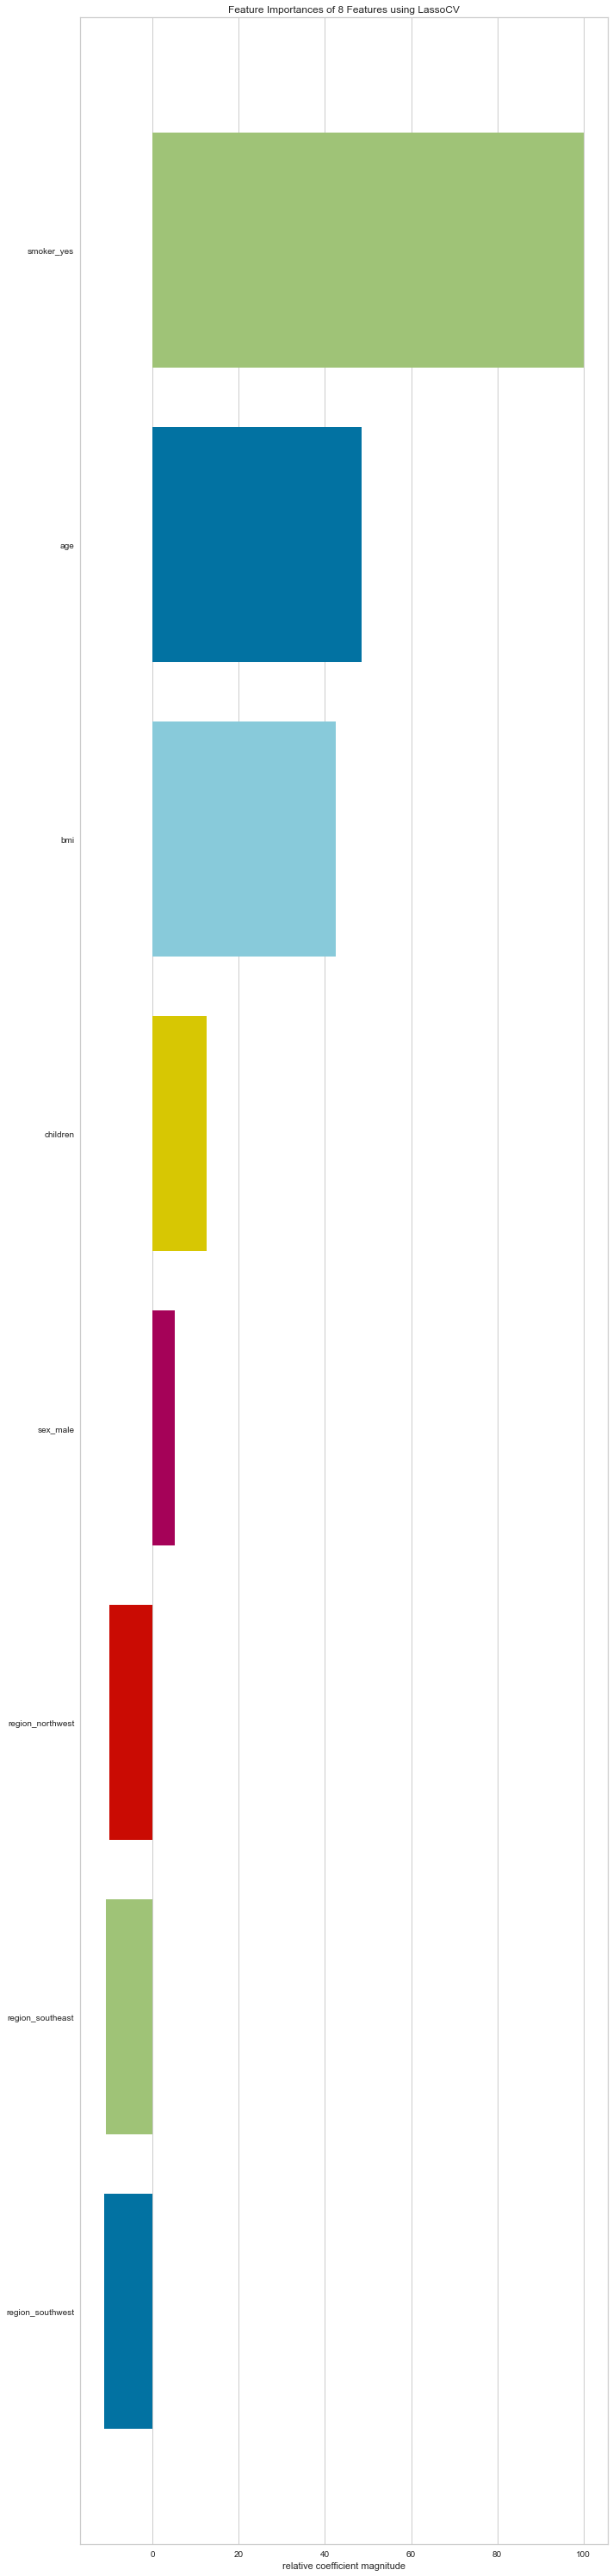

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [89]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [ ]:
X = df_train.drop(columns ="charges")
y = df_train["charges"]

In [94]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(X) 

In [98]:
final_model = Lasso(alpha = 0.91)

In [99]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.91)

In [101]:
df_test = final_scaler.transform(df_test) 

In [104]:
predictions = final_model.predict(df_test)
predictions = pd.DataFrame(predictions)

In [105]:
predictions.to_csv("C9307.csv", index=False)